### Investigation of Rounding Errors

#### Case 1:  Single Precision floating point + forward difference approximation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = 20

x = np.zeros(n,dtype=np.float32)
fx = np.zeros(n,dtype=np.float32)
fx_plus_h = np.zeros(n,dtype=np.float32)
fprime_exact = np.zeros(n,dtype=np.float32)
fprime_limit = np.zeros(n,dtype=np.float32)

diff1 = np.zeros(n,dtype=np.float32)

xval = 1.0

In [3]:
for i in range(0,n):

    hpower=i-n
    x[i]=10**int(hpower)
    fprime_exact[i]=3.0e+00*xval*xval
    fx[i]=xval*xval*xval
    fx_plus_h[i]=(xval+x[i])*(xval+x[i])*(xval+x[i]);

    fprime_limit[i]=(fx_plus_h[i]-fx[i])/(x[i]);

    diff1[i]=np.abs(fprime_exact[i]-fprime_limit[i]);

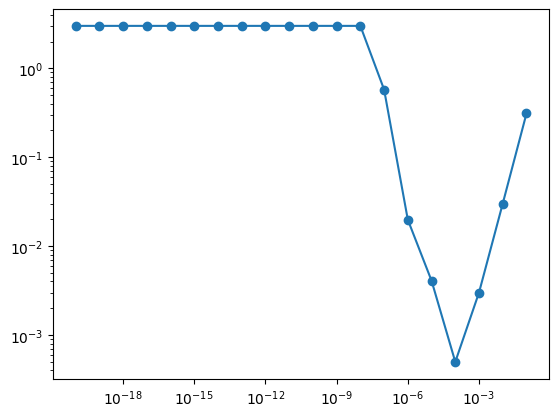

In [4]:
plt.plot(x,diff1,'o-')
plt.xscale("log")
plt.yscale("log")

#### Case 2:  Double Precision floating point + forward difference approximation

In [5]:
x = np.zeros(n)
fx = np.zeros(n)
fx_plus_h = np.zeros(n)
fprime_exact = np.zeros(n)
fprime_limit = np.zeros(n)

diff2 = np.zeros(n)

xval = 1.0

In [6]:
for i in range(0,n):

    hpower=i-n
    x[i]=10**int(hpower)
    fprime_exact[i]=3.0e+00*xval*xval
    fx[i]=xval*xval*xval
    fx_plus_h[i]=(xval+x[i])*(xval+x[i])*(xval+x[i]);

    fprime_limit[i]=(fx_plus_h[i]-fx[i])/(x[i]);

    diff2[i]=np.abs(fprime_exact[i]-fprime_limit[i]);

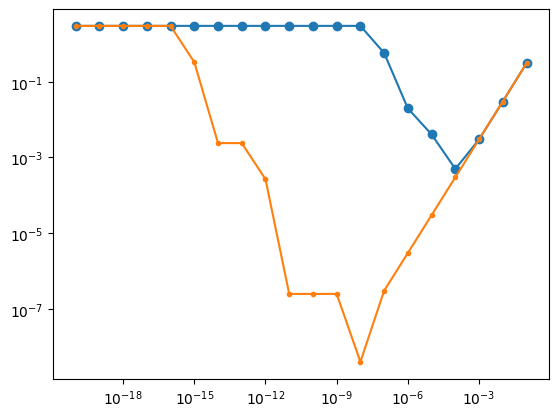

In [7]:
plt.plot(x,diff1,'o-')
plt.plot(x,diff2,'.-')
plt.xscale("log")
plt.yscale("log")

#### Case 3:  Single Precision floating point + centered difference approximation

In [8]:
x = np.zeros(n,dtype=np.float32)
fx_plus_h = np.zeros(n,dtype=np.float32)
fx_minus_h = np.zeros(n,dtype=np.float32)
fprime_exact = np.zeros(n,dtype=np.float32)
fprime_limit = np.zeros(n,dtype=np.float32)

diff3 = np.zeros(n,dtype=np.float32)

xval = 1.0

In [9]:
for i in range(0,n):

    hpower=i-n
    x[i]=10**int(hpower)
    fprime_exact[i]=3.0e+00*xval*xval
    fx_minus_h[i]=(xval-x[i])*(xval-x[i])*(xval-x[i])
    fx_plus_h[i]=(xval+x[i])*(xval+x[i])*(xval+x[i])

    fprime_limit[i]=(fx_plus_h[i]-fx_minus_h[i])/(2.0*x[i]);

    diff3[i]=np.abs(fprime_exact[i]-fprime_limit[i]);

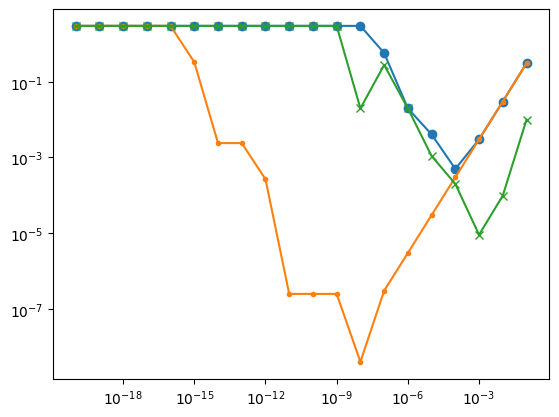

In [10]:
plt.plot(x,diff1,'o-')
plt.plot(x,diff2,'.-')
plt.plot(x,diff3,'x-')
plt.xscale("log")
plt.yscale("log")

#### Case 4:  Double Precision floating point + centered difference approximation

In [11]:
x = np.zeros(n)
fx_plus_h = np.zeros(n)
fx_minus_h = np.zeros(n)
fprime_exact = np.zeros(n)
fprime_limit = np.zeros(n)

diff4 = np.zeros(n)

xval = 1.0

In [12]:
for i in range(0,n):

    hpower=i-n
    x[i]=10**int(hpower)
    fprime_exact[i]=3.0e+00*xval*xval
    fx_minus_h[i]=(xval-x[i])*(xval-x[i])*(xval-x[i])
    fx_plus_h[i]=(xval+x[i])*(xval+x[i])*(xval+x[i])

    fprime_limit[i]=(fx_plus_h[i]-fx_minus_h[i])/(2.0*x[i]);

    diff4[i]=np.abs(fprime_exact[i]-fprime_limit[i]);

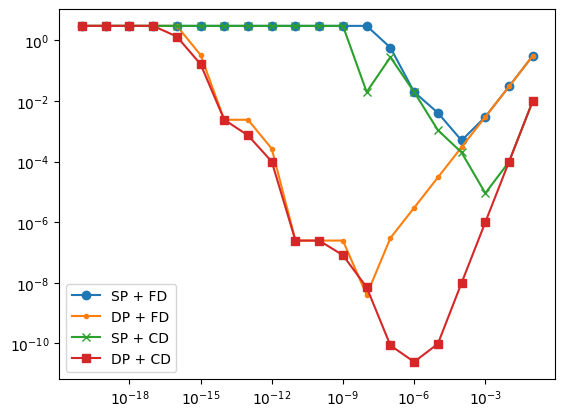

In [13]:
plt.plot(x,diff1,'o-',label='SP + FD') # single precision, forward difference
plt.plot(x,diff2,'.-',label='DP + FD') # double precision, forward difference
plt.plot(x,diff3,'x-',label='SP + CD') # single precision, centered difference
plt.plot(x,diff4,'s-',label='DP + CD') # double precision, centered difference
plt.xscale("log")
plt.yscale("log")
plt.legend()

#### Case 5:  Investigation of the function y=x$^3$

/var/folders/d9/ngkc_5vd72jcm31m7dcphclh0000gn/T/ipykernel_99754/847533339.py:32: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,yp_backward/yp,label="BD")
/var/folders/d9/ngkc_5vd72jcm31m7dcphclh0000gn/T/ipykernel_99754/847533339.py:33: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,yp_forward/yp,label="FD")
/var/folders/d9/ngkc_5vd72jcm31m7dcphclh0000gn/T/ipykernel_99754/847533339.py:34: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,yp_center/yp,label="CD")


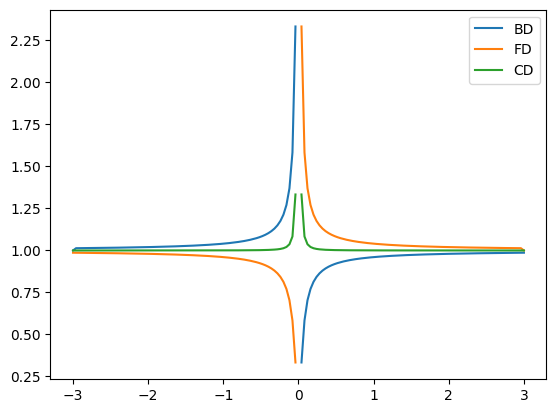

In [14]:
npts = 151
xlow = -3
xhigh = 3
x = np.linspace(xlow,xhigh,npts)
y = x**3
yp = 3.0*x**2

#plt.plot(x,y)
#plt.plot(x,yp/yp)

dx = (xhigh-xlow)/(npts-1)

yp_backward = np.zeros(npts)
yp_backward[0] = 3.0*x[0]**2

for i in range(1,npts):
    yp_backward[i] = (y[i]-y[i-1])/dx
    
yp_forward = np.zeros(npts)
yp_forward[npts-1] = 3.0*x[npts-1]**2

for i in range(0,npts-1):
    yp_forward[i] = (y[i+1]-y[i])/dx

yp_center = np.zeros(npts)
yp_center[0] = 3.0*x[0]**2
yp_center[npts-1] = 3.0*x[npts-1]**2

for i in range(1,npts-1):
    yp_center[i] = (y[i+1]-y[i-1])/(2.0*dx)

plt.plot(x,yp_backward/yp,label="BD")
plt.plot(x,yp_forward/yp,label="FD")
plt.plot(x,yp_center/yp,label="CD")
#plt.yscale("log")
plt.legend()